# Importing necessary libraries

In [67]:
import os 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from termcolor import colored as cl # text customization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB

<Figure size 432x216 with 0 Axes>

# Reading and Understanding the Credit card dataset

### The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

### It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. We can find 29 feature columns and 1 final class column. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

In [7]:
data=pd.read_csv("creditcard.csv")
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


# Data Processing

### Dataset Info - As per the count per column, we have no null values.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 28 features are transformed versions of PCA but Amount is the original one. And, while checking the minimum and maximum amount — the difference is huge that can deviate our result.

In [9]:
min(data.Amount),max(data.Amount)

(0.0, 25691.16)

### Normalising the 'Amount' Feature

In [12]:
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [13]:
data['Amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

### Time is an external deciding factor so we can drop it.

In [14]:
data.drop(['Time'], axis=1, inplace=True)

### Removing Duplicates

In [15]:
data.drop_duplicates(inplace=True)

## Train and Test Split

### The dependent variable is also known as X and the independent variable is known as y.

In [16]:
X = data.drop('Class', axis = 1).values
y = data['Class'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# Model Building

## DecisionTreeClassifier

In [18]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_predict = DT.predict(X_test)

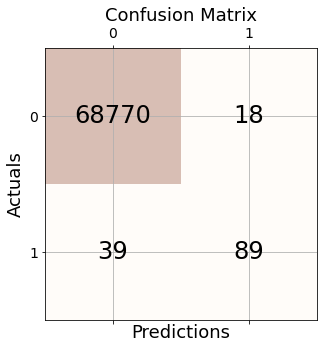

In [23]:
conf_matrix = confusion_matrix(y_test, dt_predict, labels = [0, 1])
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Performance Measures

#### True Positive (TP)
#### False Positive (FP)
#### True Negative (TN)
#### False Negative (FN)

#### Precision Score = TP / (FP + TP)
#### Recall Score = TP / (FN + TP)
#### Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)
#### F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score)

In [30]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, dt_predict)))

Accuracy score of the Decision Tree model is 0.9991729061466132


In [31]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, dt_predict)))

F1 score of the Decision Tree model is 0.7574468085106382


In [32]:
print('Recall score of the Decision Tree model is {}'.format(recall_score(y_test, dt_predict)))

Recall score of the Decision Tree model is 0.6953125


In [33]:
print('Precision score of the Decision Tree model is {}'.format(precision_score(y_test, dt_predict)))

Precision score of the Decision Tree model is 0.8317757009345794


## KNN

In [35]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_predict = KNN.predict(X_test)

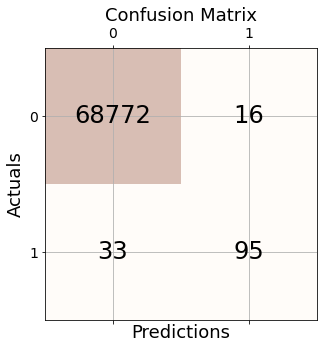

In [36]:
conf_matrix = confusion_matrix(y_test, knn_predict, labels = [0, 1])
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [37]:
print('Accuracy score of the K-nearest Neighbour model is {}'.format(accuracy_score(y_test, knn_predict)))

Accuracy score of the K-nearest Neighbour model is 0.999288989494457


In [38]:
print('F1 score of the K-nearest Neighbour model is {}'.format(f1_score(y_test, knn_predict)))

F1 score of the K-nearest Neighbour model is 0.7949790794979079


In [39]:
print('Recall score of the K-nearest Neighbour model is {}'.format(recall_score(y_test, knn_predict)))

Recall score of the K-nearest Neighbour model is 0.7421875


In [40]:
print('Precision score of the K-nearest Neighbour model is {}'.format(precision_score(y_test, knn_predict)))

Precision score of the K-nearest Neighbour model is 0.8558558558558559


## Logistic Regression

In [41]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

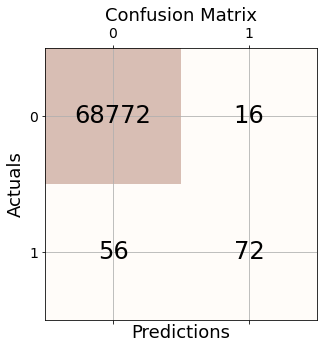

In [42]:
conf_matrix = confusion_matrix(y_test, lr_predict, labels = [0, 1])
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [43]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_predict)))

Accuracy score of the Logistic Regression model is 0.9989552498694062


In [44]:
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_predict)))

F1 score of the Logistic Regression model is 0.6666666666666666


In [45]:
print('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, lr_predict)))

Recall score of the Logistic Regression model is 0.5625


In [46]:
print('Precision score of the Logistic Regression model is {}'.format(precision_score(y_test, lr_predict)))

Precision score of the Logistic Regression model is 0.8181818181818182


## Support Vector Machine (SVM)

In [47]:
svm = SVC()
svm.fit(X_train, y_train)
svm_predict = svm.predict(X_test)

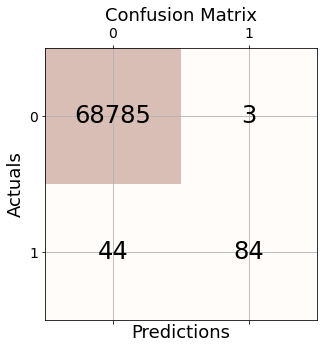

In [48]:
conf_matrix = confusion_matrix(y_test, svm_predict, labels = [0, 1])
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [49]:
print('Accuracy score of the Support Vector Machine model is {}'.format(accuracy_score(y_test, svm_predict)))

Accuracy score of the Support Vector Machine model is 0.999318010331418


In [50]:
print('F1 score of the Support Vector Machine model is {}'.format(f1_score(y_test, svm_predict)))

F1 score of the Support Vector Machine model is 0.7813953488372093


In [51]:
print('Recall score of the Support Vector Machine model is {}'.format(recall_score(y_test, svm_predict)))

Recall score of the Support Vector Machine model is 0.65625


In [52]:
print('Precision score of the Support Vector Machine model is {}'.format(precision_score(y_test, svm_predict)))

Precision score of the Support Vector Machine model is 0.9655172413793104


## Random Forest Classifier

In [53]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

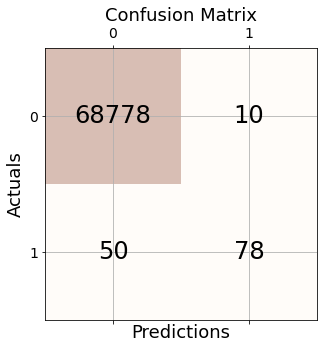

In [55]:
conf_matrix = confusion_matrix(y_test, rf_predict, labels = [0, 1])
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [56]:
print('Accuracy score of the Random Forest Classifier model is {}'.format(accuracy_score(y_test, rf_predict)))

Accuracy score of the Random Forest Classifier model is 0.9991293748911718


In [57]:
print('F1 score of the Random Forest Classifier model is {}'.format(f1_score(y_test, rf_predict)))

F1 score of the Random Forest Classifier model is 0.7222222222222223


In [58]:
print('Recall score of the Random Forest Classifier model is {}'.format(recall_score(y_test, rf_predict)))

Recall score of the Random Forest Classifier model is 0.609375


In [59]:
print('Precision score of the Random Forest Classifier model is {}'.format(precision_score(y_test, rf_predict)))

Precision score of the Random Forest Classifier model is 0.8863636363636364


## Naive Bayes

In [60]:
gnb = GaussianNB()
nb_predict = gnb.fit(X_train, y_train).predict(X_test)

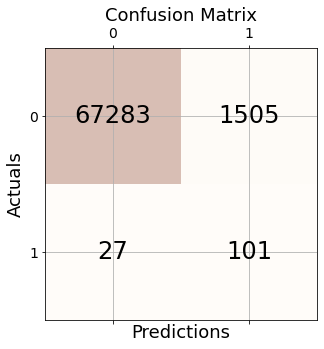

In [66]:
conf_matrix = confusion_matrix(y_test, nb_predict, labels = [0, 1])
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [62]:
print('Accuracy score of the Naive Bayes Classifier model is {}'.format(accuracy_score(y_test, nb_predict)))

Accuracy score of the Naive Bayes Classifier model is 0.9777700388879216


In [63]:
print('F1 score of the Naive Bayes Classifier model is {}'.format(f1_score(y_test, nb_predict)))

F1 score of the Naive Bayes Classifier model is 0.11649365628604383


In [64]:
print('Recall score of the Naive Bayes Classifier model is {}'.format(recall_score(y_test, nb_predict)))

Recall score of the Naive Bayes Classifier model is 0.7890625


In [65]:
print('Precision score of the Naive Bayes Classifier model is {}'.format(precision_score(y_test, nb_predict)))

Precision score of the Naive Bayes Classifier model is 0.06288916562889166
